In [2]:
# importing libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

from sklearn.decomposition import PCA
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier

# to supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("../dataset/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Exploratory Data Analysis

In [4]:
data.shape

(2126, 22)

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

About target value
* 1 = Normal
* 2 = Suspect
* 3 = Pathological

In [7]:
df = data.copy(deep=True)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
df['fetal_health'] = df['fetal_health'].replace({
        1.0: "NORMAL",
        2.0: "SUSPECT",
        3.0: "PATHOLOGICAL"
    })

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,SUSPECT
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,NORMAL
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,NORMAL
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,NORMAL
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,NORMAL


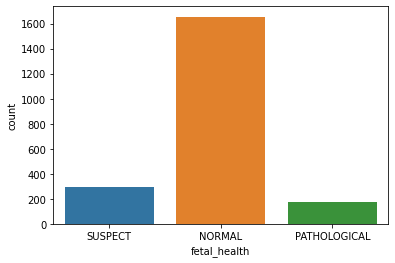

In [9]:
sns.countplot(x=df['fetal_health'])
plt.show()

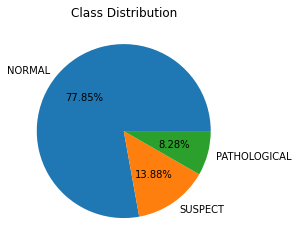

In [10]:
plt.pie(
    df['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels=['NORMAL','SUSPECT','PATHOLOGICAL']
)

plt.title("Class Distribution")
plt.show()

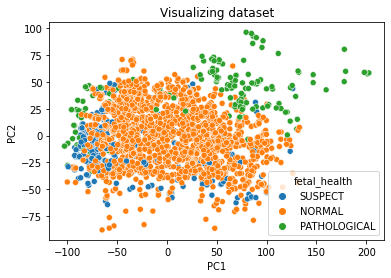

In [11]:
# visualizing dataset using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df.iloc[:,:-1])
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=df.iloc[:,-1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualizing dataset")
plt.show()

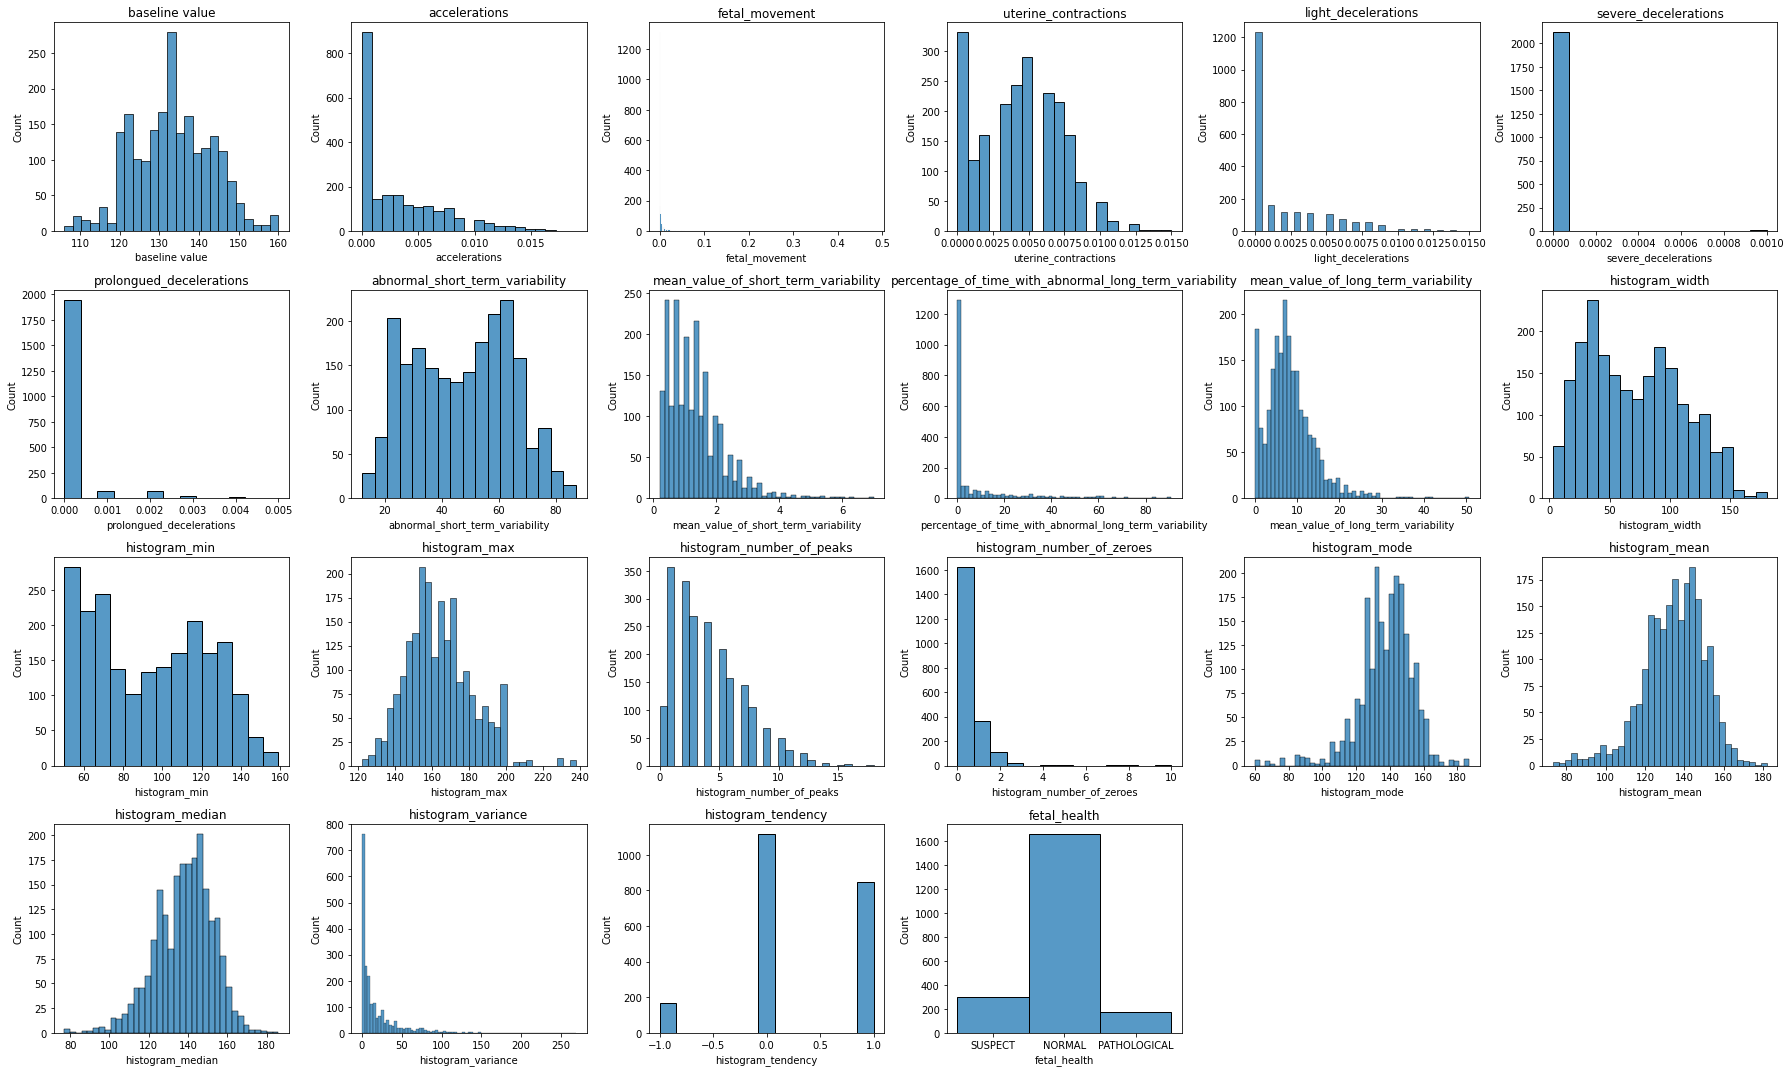

In [16]:
plt.figure(figsize=(25, 15))

for i, col in enumerate(df.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(data = df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

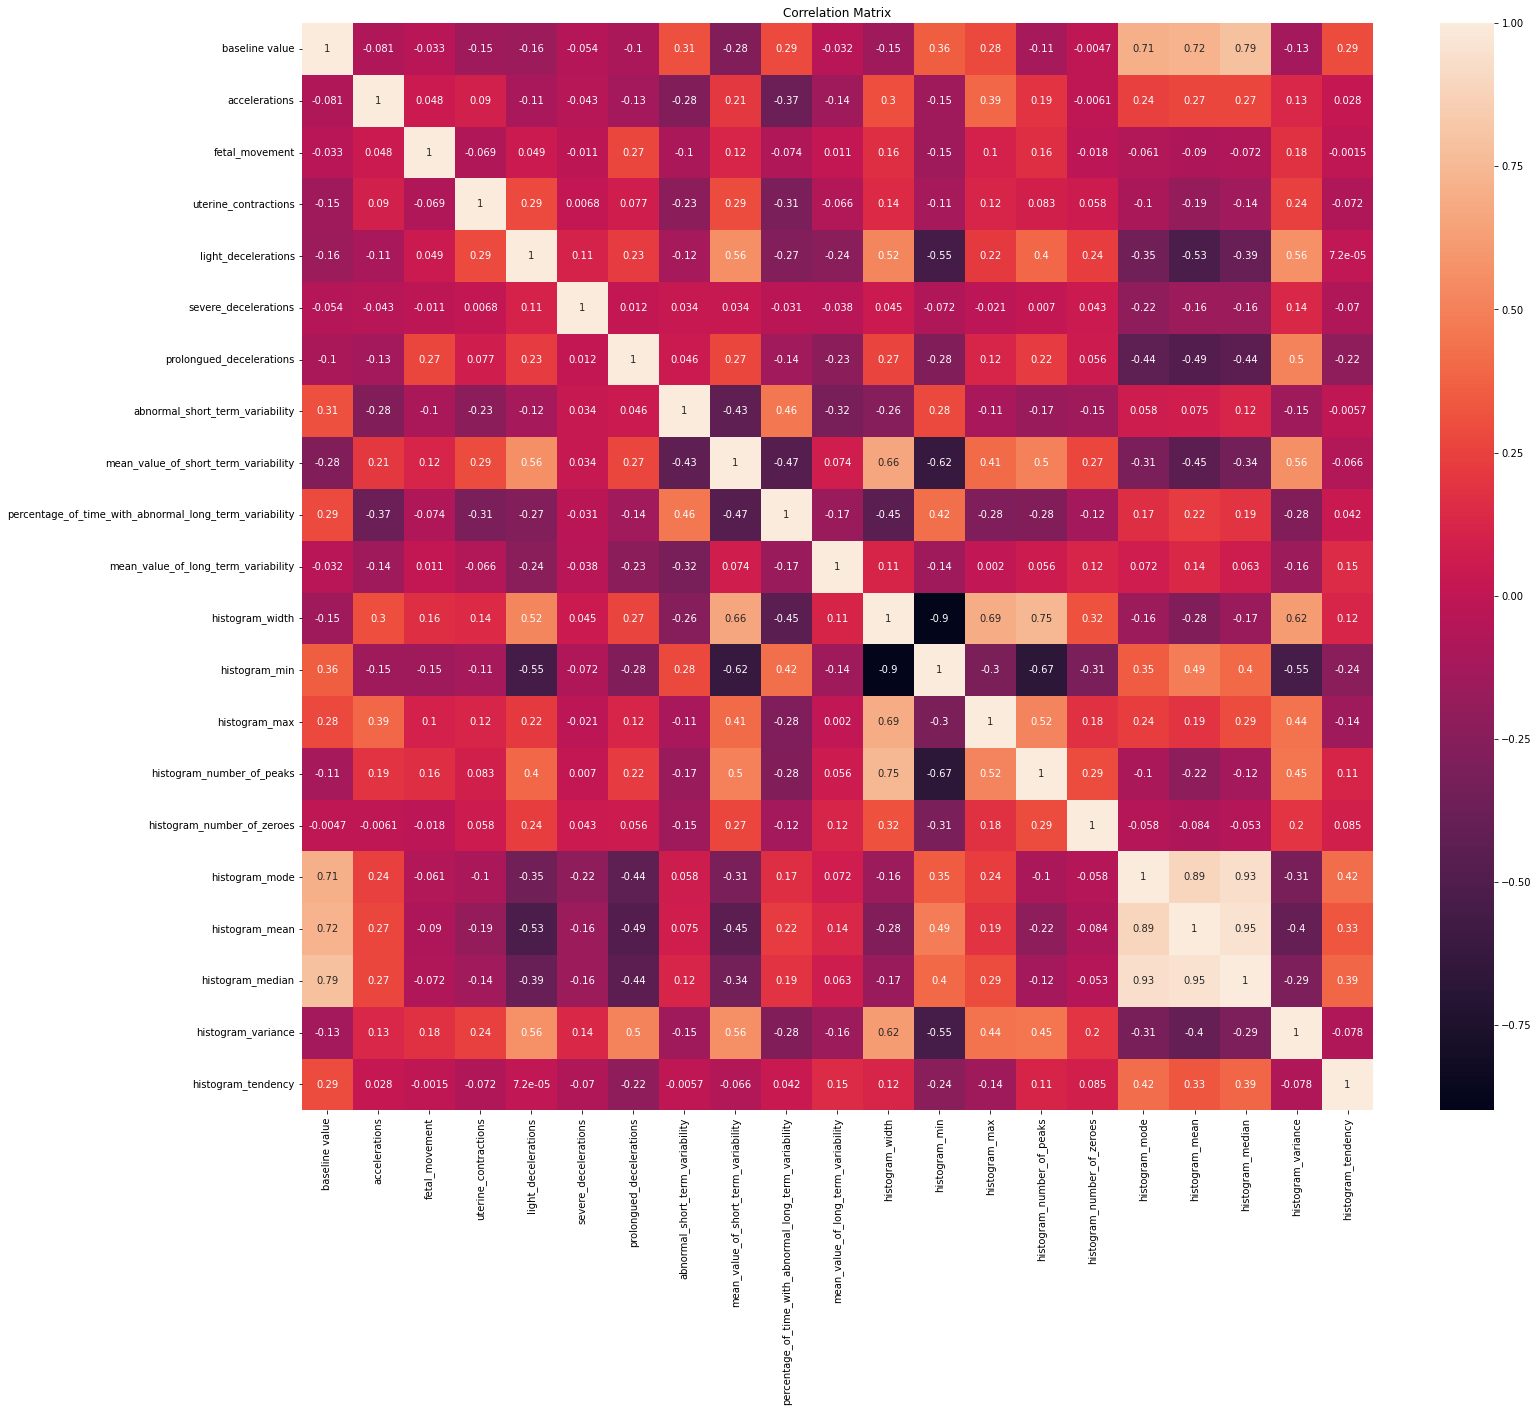

In [12]:
plt.figure(figsize=(24, 20))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
def preprocess(data):
    df = data.copy(deep=True)
    
    # X and y split and dropping 2 features
    df = df.drop(['histogram_mode','histogram_median'],axis=1)
    X = df.drop('fetal_health',axis=1)
    y = df['fetal_health']
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # standard scaling
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = pd.DataFrame(sc.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = preprocess(df)

In [15]:
X_train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency
1233,-0.818907,-0.824976,-0.204261,1.218555,-0.637350,-0.064301,-0.268148,-0.859657,-0.262589,-0.367038,0.829032,-0.500418,0.090151,-0.947494,-0.014607,-0.445313,-0.603307,-0.580514,-0.516697
480,0.692429,-0.824976,-0.204261,-1.159016,-0.637350,-0.064301,-0.268148,0.762723,-0.604484,1.233861,0.513834,1.267146,-0.482204,1.975298,1.686204,-0.445313,0.414302,-0.545964,-0.516697
1111,-1.121174,-0.824976,-0.204261,-1.498669,-0.296949,-0.064301,-0.268148,-1.554963,0.535166,-0.532648,0.969120,-0.807820,0.325826,-1.228531,-1.035093,-0.445313,-0.984911,-0.545964,-0.516697
1303,0.390162,0.464049,-0.204261,0.199596,0.043451,-0.064301,-0.268148,-0.627888,-0.490519,-0.532648,-0.571847,-0.193016,0.729841,0.794940,-0.014607,-0.445313,0.859505,-0.338667,-0.516697
861,0.893941,-0.051561,-0.204261,-0.140057,-0.637350,-0.064301,-0.268148,-0.048467,-0.718449,0.957844,-0.414248,-1.140840,1.335863,-0.273003,-1.035093,-0.445313,0.859505,-0.615063,-0.516697


## Defining metric (recall)

In [16]:
def recall_cal(y_true,y_pred):
    recall_df = pd.DataFrame(zip(['NORMAL','SUSPECT','PATHOLOGICAL'],
                                 recall_score(y_true,y_pred,average=None)),
                             columns=['Class','Recall Score'])
    recall_df.loc[len(recall_df.index)] = ['MACRO RECALL',recall_score(y_true,y_pred,average='macro')] 
    return recall_df

### Baseline Model 1: Mode

In [17]:
class bs_mode:
    
    def __init__(self):
        self.mode = None
    
    def fit(self,X,y):
        self.mode = stats.mode(y)
        
    def predict(self,X):
        y_pred = [self.mode for i in range(X.shape[0])]
        return np.array(y_pred)

In [18]:
m1 = bs_mode()
m1.fit(X_train,y_train)
y_pred_train_mode = m1.predict(X_train)
y_pred_test_mode = m1.predict(X_test)

In [19]:
y_pred_train_mode

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'NORMAL', 'NORMAL', 'NORMAL'],
      dtype='<U6')

In [20]:
y_pred_test_mode[0:10]

array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL'], dtype='<U6')

In [21]:
print("TRAINING SET RESULTS")
print("MODEL: Mode")
print("-"*30)
print(recall_cal(y_train,y_pred_train_mode).to_string(index=False))

TRAINING SET RESULTS
MODEL: Mode
------------------------------
       Class  Recall Score
      NORMAL      1.000000
     SUSPECT      0.000000
PATHOLOGICAL      0.000000
MACRO RECALL      0.333333


In [22]:
print("TESTING SET RESULTS")
print("MODEL: Mode")
print("-"*30)
print(recall_cal(y_test,y_pred_test_mode).to_string(index=False))

TESTING SET RESULTS
MODEL: Mode
------------------------------
       Class  Recall Score
      NORMAL      1.000000
     SUSPECT      0.000000
PATHOLOGICAL      0.000000
MACRO RECALL      0.333333


### Baseline Model 2: Logistic Regression

In [23]:
m2 = LogisticRegression()
m2.fit(X_train,y_train)
y_pred_train_lr = m2.predict(X_train)
y_pred_test_lr = m2.predict(X_test)

In [24]:
print("TRAINING SET RESULTS")
print("MODEL: Logistic Regression with default params")
print("-"*50)
print(recall_cal(y_train,y_pred_train_lr).to_string(index=False))

TRAINING SET RESULTS
MODEL: Logistic Regression with default params
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.959909
     SUSPECT      0.816327
PATHOLOGICAL      0.683983
MACRO RECALL      0.820073


In [25]:
print("TESTING SET RESULTS")
print("MODEL: Logistic Regression with default params")
print("-"*50)
print(recall_cal(y_test,y_pred_test_lr).to_string(index=False))

TESTING SET RESULTS
MODEL: Logistic Regression with default params
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.927928
     SUSPECT      0.689655
PATHOLOGICAL      0.656250
MACRO RECALL      0.757944


## Trying different models

#### Logistic Regression with params changing

In [26]:
m3 = LogisticRegression(class_weight='balanced')
m3.fit(X_train,y_train)
y_pred_train_3 = m3.predict(X_train)
y_pred_test_3 = m3.predict(X_test)

In [27]:
print("TRAINING SET RESULTS")
print("MODEL: Logistic Regression with class_weight='balanced'")
print("-"*50)
print(recall_cal(y_train,y_pred_train_3).to_string(index=False))

TRAINING SET RESULTS
MODEL: Logistic Regression with class_weight='balanced'
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.875946
     SUSPECT      0.891156
PATHOLOGICAL      0.865801
MACRO RECALL      0.877634


In [28]:
print("TESTING SET RESULTS")
print("MODEL: Logistic Regression with class_weight='balanced'")
print("-"*50)
print(recall_cal(y_test,y_pred_test_3).to_string(index=False))

TESTING SET RESULTS
MODEL: Logistic Regression with class_weight='balanced'
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.834835
     SUSPECT      0.758621
PATHOLOGICAL      0.781250
MACRO RECALL      0.791569


#### Logistic Regression with params changing and OVO

In [29]:
m4 = OneVsOneClassifier(LogisticRegression(class_weight='balanced'))
m4.fit(X_train,y_train)
y_pred_train_4 = m4.predict(X_train)
y_pred_test_4 = m4.predict(X_test)

In [30]:
print("TRAINING SET RESULTS")
print("MODEL: Logistic Regression with class_weight='balanced' and OVO")
print("-"*50)
print(recall_cal(y_train,y_pred_train_4).to_string(index=False))

TRAINING SET RESULTS
MODEL: Logistic Regression with class_weight='balanced' and OVO
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.883510
     SUSPECT      0.904762
PATHOLOGICAL      0.874459
MACRO RECALL      0.887577


In [31]:
print("TESTING SET RESULTS")
print("MODEL: Logistic Regression with class_weight='balanced' and OVO")
print("-"*50)
print(recall_cal(y_test,y_pred_test_4).to_string(index=False))

TESTING SET RESULTS
MODEL: Logistic Regression with class_weight='balanced' and OVO
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.834835
     SUSPECT      0.862069
PATHOLOGICAL      0.796875
MACRO RECALL      0.831260


#### SVC with params changing 

In [32]:
m5 = SVC(class_weight='balanced',decision_function_shape='ovo',kernel='rbf')
m5.fit(X_train,y_train)
y_pred_train_5 = m5.predict(X_train)
y_pred_test_5 = m5.predict(X_test)

In [33]:
print("TRAINING SET RESULTS")
print("MODEL: SVC with class_weight='balanced' and OVO (kernel:rbf)")
print("-"*50)
print(recall_cal(y_train,y_pred_train_5).to_string(index=False))

TRAINING SET RESULTS
MODEL: SVC with class_weight='balanced' and OVO (kernel:rbf)
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.892587
     SUSPECT      0.938776
PATHOLOGICAL      0.956710
MACRO RECALL      0.929357


In [34]:
print("TESTING SET RESULTS")
print("MODEL: MODEL: SVC with class_weight='balanced' and OVO (kernel:rbf)")
print("-"*50)
print(recall_cal(y_test,y_pred_test_5).to_string(index=False))

TESTING SET RESULTS
MODEL: MODEL: SVC with class_weight='balanced' and OVO (kernel:rbf)
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.870871
     SUSPECT      0.896552
PATHOLOGICAL      0.890625
MACRO RECALL      0.886016


#### DT Classifier with params changing 

In [35]:
m6 = DecisionTreeClassifier(random_state=28,max_depth=7,min_samples_split=10)
m6.fit(X_train,y_train)
y_pred_train_6 = m6.predict(X_train)
y_pred_test_6 = m6.predict(X_test)

In [36]:
print("TRAINING SET RESULTS")
print("MODEL: DT with max_depth=7,min_samples_split=10")
print("-"*50)
print(recall_cal(y_train,y_pred_train_6).to_string(index=False))

TRAINING SET RESULTS
MODEL: DT with max_depth=7,min_samples_split=10
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.977307
     SUSPECT      0.931973
PATHOLOGICAL      0.878788
MACRO RECALL      0.929356


In [37]:
print("TESTING SET RESULTS")
print("MODEL: DT with max_depth=7,min_samples_split=10")
print("-"*50)
print(recall_cal(y_test,y_pred_test_6).to_string(index=False))

TESTING SET RESULTS
MODEL: DT with max_depth=7,min_samples_split=10
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.942943
     SUSPECT      0.931034
PATHOLOGICAL      0.843750
MACRO RECALL      0.905909


#### kNN Classifier with params changing 

In [38]:
m7 = KNeighborsClassifier(n_neighbors=5,weights='distance')
m7.fit(X_train,y_train)
y_pred_train_7 = m7.predict(X_train)
y_pred_test_7 = m7.predict(X_test)

In [39]:
print("TRAINING SET RESULTS")
print("MODEL: kNN (k=5, weights='distance')")
print("-"*50)
print(recall_cal(y_train,y_pred_train_7).to_string(index=False))

TRAINING SET RESULTS
MODEL: kNN (k=5, weights='distance')
--------------------------------------------------
       Class  Recall Score
      NORMAL           1.0
     SUSPECT           1.0
PATHOLOGICAL           1.0
MACRO RECALL           1.0


In [40]:
print("TESTING SET RESULTS")
print("MODEL: kNN (k=5, weights='distance')")
print("-"*50)
print(recall_cal(y_test,y_pred_test_7).to_string(index=False))

TESTING SET RESULTS
MODEL: kNN (k=5, weights='distance')
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.966967
     SUSPECT      0.862069
PATHOLOGICAL      0.734375
MACRO RECALL      0.854470


#### Random Forest Classifier with params changing 

In [41]:
m8 = RandomForestClassifier(random_state=28,n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)
m8.fit(X_train,y_train)
y_pred_train_8 = m8.predict(X_train)
y_pred_test_8 = m8.predict(X_test)

In [42]:
print("TRAINING SET RESULTS")
print("MODEL: Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)")
print("-"*50)
print(recall_cal(y_train,y_pred_train_8).to_string(index=False))

TRAINING SET RESULTS
MODEL: Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.919062
     SUSPECT      0.965986
PATHOLOGICAL      0.930736
MACRO RECALL      0.938595


In [43]:
print("TESTING SET RESULTS")
print("MODEL: Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)")
print("-"*50)
print(recall_cal(y_test,y_pred_test_8).to_string(index=False))

TESTING SET RESULTS
MODEL: Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.894895
     SUSPECT      0.965517
PATHOLOGICAL      0.890625
MACRO RECALL      0.917012


#### AdaBoost Classifier with params changing 

In [44]:
m9 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=28,
                                                              max_depth=7,
                                                              min_samples_split=10),
                        random_state=28,n_estimators=40,learning_rate=1.5)
m9.fit(X_train,y_train)
y_pred_train_9 = m9.predict(X_train)
y_pred_test_9 = m9.predict(X_test)

In [45]:
print("TRAINING SET RESULTS")
print("MODEL: AdaBoostClassifier")
print("params: base_estimator=DecisionTreeClassifier(max_depth=7,min_samples_split=10),n_estimators=40,learning_rate=1.5")
print("-"*50)
print(recall_cal(y_train,y_pred_train_9).to_string(index=False))

TRAINING SET RESULTS
MODEL: AdaBoostClassifier
params: base_estimator=DecisionTreeClassifier(max_depth=7,min_samples_split=10),n_estimators=40,learning_rate=1.5
--------------------------------------------------
       Class  Recall Score
      NORMAL           1.0
     SUSPECT           1.0
PATHOLOGICAL           1.0
MACRO RECALL           1.0


In [46]:
print("TESTING SET RESULTS")
print("MODEL: AdaBoostClassifier")
print("params: base_estimator=DecisionTreeClassifier(max_depth=7,min_samples_split=10),n_estimators=40,learning_rate=1.5")
print("-"*50)
print(recall_cal(y_test,y_pred_test_9).to_string(index=False))

TESTING SET RESULTS
MODEL: AdaBoostClassifier
params: base_estimator=DecisionTreeClassifier(max_depth=7,min_samples_split=10),n_estimators=40,learning_rate=1.5
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.984985
     SUSPECT      0.931034
PATHOLOGICAL      0.875000
MACRO RECALL      0.930340


### How to classify final point?
Using 3 models and then using majority voting
Models Used
* SVC with class_weight='balanced' and OVO (kernel:rbf)
* Random Forest Classifier (n_estimators=65,class_weight='balanced',criterion='gini',min_samples_leaf=15)
* AdaBoostClassifier with base_estimator=DecisionTreeClassifier(max_depth=7,min_samples_split=10),n_estimators=40,learning_rate=1.5
* DecisionTreeClassifier(max_depth=7,min_samples_split=10)

In [105]:
pickle.dump(m8, open("../models/fetal_hc_1", 'wb'))
pickle.dump(m5, open("../models/fetal_hc_2", 'wb'))
pickle.dump(m6, open("../models/fetal_hc_3", 'wb'))
pickle.dump(m9, open("../models/fetal_hc_4", 'wb'))

In [106]:
def pred_final(X):
    lm1 = pickle.load(open("../models/fetal_hc_1", 'rb'))
    lm2 = pickle.load(open("../models/fetal_hc_2", 'rb'))
    lm3 = pickle.load(open("../models/fetal_hc_3", 'rb'))
    lm4 = pickle.load(open("../models/fetal_hc_4", 'rb'))
    y_pred = []
    yp1 = lm1.predict(X)
    yp2 = lm2.predict(X)
    yp3 = lm3.predict(X)
    yp4 = lm4.predict(X)
    for i,j,k,l in zip(yp1,yp2,yp3,yp4):
        li = [i,j,k,l]
        li = Counter(li)
        li = {k: v for k, v in sorted(li.items(), key=lambda item: item[1],reverse=True)}
        y_pred.append(list(li.keys())[0])
    return np.array(y_pred)

In [107]:
y_pred_train_fm = pred_final(X_train)
y_pred_test_fm = pred_final(X_test)

In [108]:
print("TRAINING SET RESULTS")
print("-"*50)
print(recall_cal(y_train,y_pred_train_fm).to_string(index=False))

TRAINING SET RESULTS
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.931921
     SUSPECT      0.965986
PATHOLOGICAL      0.956710
MACRO RECALL      0.951539


In [109]:
print("TESTING SET RESULTS")
print("-"*50)
print(recall_cal(y_test,y_pred_test_fm).to_string(index=False))

TESTING SET RESULTS
--------------------------------------------------
       Class  Recall Score
      NORMAL      0.912913
     SUSPECT      0.931034
PATHOLOGICAL      0.921875
MACRO RECALL      0.921941


In [110]:
print("TRAIN CLASSIFICATION REPORT")
print("-"*50)
print(classification_report(y_train,y_pred_train_fm))

print("TEST CLASSIFICATION REPORT")
print("-"*50)
print(classification_report(y_test,y_pred_test_fm))

TRAIN CLASSIFICATION REPORT
--------------------------------------------------
              precision    recall  f1-score   support

      NORMAL       0.99      0.93      0.96      1322
PATHOLOGICAL       0.96      0.97      0.96       147
     SUSPECT       0.72      0.96      0.82       231

    accuracy                           0.94      1700
   macro avg       0.89      0.95      0.91      1700
weighted avg       0.95      0.94      0.94      1700

TEST CLASSIFICATION REPORT
--------------------------------------------------
              precision    recall  f1-score   support

      NORMAL       0.99      0.91      0.95       333
PATHOLOGICAL       0.84      0.93      0.89        29
     SUSPECT       0.69      0.92      0.79        64

    accuracy                           0.92       426
   macro avg       0.84      0.92      0.87       426
weighted avg       0.93      0.92      0.92       426



In [102]:
X_train.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mean', 'histogram_variance',
       'histogram_tendency'],
      dtype='object')

In [103]:
X_train.shape

(1700, 19)

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 1233 to 860
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1700 non-null   float64
 1   accelerations                                           1700 non-null   float64
 2   fetal_movement                                          1700 non-null   float64
 3   uterine_contractions                                    1700 non-null   float64
 4   light_decelerations                                     1700 non-null   float64
 5   severe_decelerations                                    1700 non-null   float64
 6   prolongued_decelerations                                1700 non-null   float64
 7   abnormal_short_term_variability                         1700 non-null   float64
 8   mean_value_of_short_term_variability

In [61]:
scobj = StandardScaler()
scobj.fit(X_train)

StandardScaler()

In [65]:
pickle.dump(scobj,open("../models/StandardScalerObj",'wb'))